In [1]:
import numpy as np
import pandas as pd
#import pdb

from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics

np.random.seed(1234)

In [2]:
#Read Data

#read csv data
positive_data = pd.read_csv('Rpositive51.csv', sep = ",", header = None)
negative_data = pd.read_csv('Rnegative51.csv',  sep = ",", header = None)


In [3]:
#Data Preprocessing - Convert to Dataframe

#def for convert txt data to dataframe
def preprocess_data(data):
    data1 = data[data.isnull().any(axis=1)].reset_index()
    data2 = data.dropna().reset_index()
    data3 = pd.concat([data1, data2], axis=1, sort=False, ignore_index=True)
    data3.drop(columns=[0,1,2], inplace=True)
    data3.rename(index=str, columns={3: "sequence"}, inplace = True)
    return data3

#applying def
negative_set = preprocess_data(negative_data)
positive_set = preprocess_data(positive_data)


In [4]:
positive_set.shape

(1925, 1)

In [5]:
positive_set

,sequence
0,AGGSSVGHNNLIPLANTGIVNHTHSRMGSIMSTGIVQGSSGAQGGG...
1,PKKRKLESGGGGEGGEGTEEEDGAEREAALERPRRTKRERDQLYYE...
2,ESGGGGEGGEGTEEEDGAEREAALERPRRTKRERDQLYYECYSDVS...
3,GGGGEGGEGTEEEDGAEREAALERPRRTKRERDQLYYECYSDVSVH...
4,VAIADYAATDETQLSFLRGEKILILRQTTADWWWGERAGCCGYIPA...
...,...
1920,LIPHAVLPPTVDVVALGRSSLRTLSRCSLLSASPASVRSLGRFSSA...
1921,APWPEWALPRLSSAWPGTLRSGMVPRGPPATARFGVPAEGRSPPPF...
1922,LPRLSSAWPGTLRSGMVPRGPPATARFGVPAEGRSPPPFPGEPWKV...
1923,XXXXMALVDKHKVKRQRLDRICEGIRPQIMNGPLHPRPLVALLDGR...


In [6]:
#take the sequence
negative_seq = np.array([ list(word) for word in negative_set.sequence.values])
positive_seq = np.array([ list(word) for word in positive_set.sequence.values])

In [7]:
positive_seq.shape

(1925, 51)

In [8]:
#create label 

negative_lab = np.zeros(negative_seq.shape[0])
positive_lab = np.ones(positive_seq.shape[0])

In [9]:
x = np.concatenate((positive_seq, negative_seq), axis=0)
y = np.concatenate((positive_lab, negative_lab), axis=0)

In [10]:
x.shape

(48576, 51)

In [11]:
#Data imbalance problem
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=7)
x_bal, y_bal = rus.fit_resample(x, y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
x_bal.shape

(3850, 51)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test1,y_train,y_test = train_test_split(x_bal, y_bal, test_size=0.20)

In [ ]:
x_train1,x_val1,y_train,y_val = train_test_split(x_train, y_train, test_size=0.20)

In [ ]:
x_train1.shape

(2464, 51)

In [ ]:
# Data Preprocessing - Shuffle Data

x_train1, y_train = shuffle(x_train1, y_train, random_state=1234)
x_val1, y_val = shuffle(x_val1, y_val, random_state=1234)
x_test1, y_test = shuffle(x_test1, y_test, random_state=1234)
print(x_train1.shape)

(2464, 51)


In [ ]:
#indicator matrices

# def indicat(data):
#     data = np.array(data)
#     #print(data)
#     out = []
#     for i in range(0, data.shape[0]):
#         da = ''.join(data[i])
#         N = len(da)
#         #print(da)
#         M = np.zeros((N,N))
#         for j in range(0,N):
#             for k in range(0,N):
#                 if da[j] == da[k]:
#                     M[j,k] = 1
#                 else:
#                     M[j,k] = 0
#         #print(M)
#         out.append(M)
#     out=np.asarray(out)
#     #print(out)
#     print(out.shape)
#     return out
        
    
# #applying def
# x_train = indicat(x_train1)
# x_val = indicat(x_val1)
# x_test = indicat(x_test1)

In [ ]:
#groups based on physicochemical properties

# def group(x):
#     amino = []
#     for i in range(0, x.shape[0]):
#         a = list(x[i])
#         tmp = ""
#         for sym in a:
#             if((sym == 'A') or (sym == 'G') or (sym == 'V')):
#                 tmp += "1"
#             elif((sym == 'I') or (sym == 'L') or (sym == 'F') or (sym == 'P')):
#                 tmp += "2"
#             elif((sym == 'Y') or (sym == 'M') or (sym == 'T') or (sym == 'S')):
#                 tmp += "3"
#             elif((sym == 'H') or (sym == 'N') or (sym == 'Q') or (sym == 'W')):
#                 tmp += "4"
#             elif((sym == 'R') or (sym == 'K')):
#                 tmp += "5"
#             elif((sym == 'D') or (sym == 'E')):
#                 tmp += "6"
#             elif((sym == 'C') or (sym == 'X')):
#                 tmp += "7"
#         tmp = list(tmp)
#         #print(tmp)
#         po = pd.read_csv("encode.csv")
#         ko=po.loc[:,tmp]
#         #print(ko)
#         kd=ko.to_numpy().transpose()
#         #print(kd)
#         amino.append(kd)
#     out=np.asarray(amino)
#     #print(out)
#     print(out.shape)
#     return out


# #applying def
# x_train = group(x_train1)
# x_val = group(x_val1)
# x_test = group(x_test1)

(2464, 51, 7)
(616, 51, 7)
(770, 51, 7)


In [ ]:
#Data Preprocessing - One Hot Encoding

# def one_hot_encoding(x):
#     #x = np.array(x)
#     #print(x.shape)
#     y = np.reshape(x, (-1, 1))
#     #print(y.shape)
#     from sklearn.preprocessing import OneHotEncoder
#     enc = OneHotEncoder(handle_unknown='ignore')
#     enc.fit(y)
#     #print(len(x))
#     out = []
#     for i in range(0, len(x)):
#         a = np.reshape(x[i], (-1, 1))
#         out.append(enc.transform(a).toarray())
#     out=np.asarray(out)
#     #print(out)
#     print(out.shape)
#     return out

# #applying def
# x_train = one_hot_encoding(x_train1)
# x_val = one_hot_encoding(x_val1)
# x_test = one_hot_encoding(x_test1)

(2464, 51, 21)
(616, 51, 21)
(770, 51, 21)


In [ ]:
#embedding layer
from keras.layers import Embedding
from keras.preprocessing.text import one_hot

def embed(x):
    #print(x.shape[0])
    aa = []
    for i in range(0, x.shape[0]):
        da = ''.join(x[i])
        #print(type(da))
        data = da.lower()
        #print(data)
        result = ''
        for ch in data:
           result = result + ch + ' '
        #print(result[:-1])
        aa.append(result[:-1])
    #print(aa)
    Vocab_size = 500
    x_encoded = [one_hot(d,Vocab_size) for d in aa]
    print(x_encoded)
    return x_encoded
    
x_train = embed(x_train1)
x_val = embed(x_val1)
x_test = embed(x_test1)

[[354, 464, 146, 276, 146, 325, 382, 354, 12, 231, 382, 12, 231, 231, 231, 170, 231, 90, 276, 382, 382, 382, 382, 354, 170, 12, 354, 146, 382, 325, 382, 231, 382, 382, 231, 354, 382, 12, 354, 354, 231, 231, 146, 382, 325, 162, 354, 382, 325, 162, 146], [151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 151, 165, 170, 12, 146, 464, 276, 146, 170, 12, 464, 354, 146, 231, 231, 464, 170, 382, 12, 464, 276, 325, 170, 146, 464, 170, 170, 12, 464], [170, 170, 368, 325, 90, 362, 325, 146, 170, 90, 275, 325, 90, 325, 170, 231, 170, 170, 170, 12, 66, 170, 464, 464, 146, 12, 275, 275, 382, 12, 162, 325, 276, 325, 170, 275, 12, 170, 66, 90, 90, 325, 170, 464, 325, 325, 231, 12, 368, 146, 275], [113, 146, 276, 276, 368, 12, 170, 464, 325, 12, 90, 275, 90, 276, 276, 275, 464, 90, 12, 231, 276, 170, 368, 90, 368, 12, 461, 354, 113, 66, 464, 123, 276, 90, 170, 146, 170, 231, 113, 146, 275, 231, 12, 368, 325, 162, 146, 325, 90, 368, 325], [464

In [ ]:
# x_train = np.concatenate((x_train2, x_train3), axis=2, out=None)
# x_val = np.concatenate((x_val2, x_val3), axis=2, out=None)
# x_test = np.concatenate((x_test2, x_test3), axis=2, out=None)

In [ ]:
print(x_train.shape)

(2464, 51, 7)


In [ ]:
# def one_hot_label(x):
#     #print(x.shape)
#     y = np.reshape(x, (-1, 1))
#     from sklearn.preprocessing import OneHotEncoder
#     enc = OneHotEncoder(handle_unknown='ignore')
#     enc_data = pd.DataFrame(enc.fit_transform(y).toarray())
#     #print(enc_data)
#     out=np.asarray(enc_data)
#     #print(out)
#     print(out.shape)
#     return enc_data

# #applying def
# y_train = one_hot_label(y_train)
# y_val = one_hot_label(y_val)
# y_test = one_hot_label(y_test)

In [ ]:
# CNN-GRU Model function
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, LSTM, GRU, Input, concatenate, ReLU, LeakyReLU, InputLayer
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.models import Model

def get_cnn_model(input_shape):
    model1 = Sequential()
        
    model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
    #model1.add(BatchNormalization())
    #model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.3))
    
    model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    #model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.3))
   
    model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    
    model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    
    model1.add(Flatten())

    model1.add(Dense(64, 'relu'))
    return model1

def get_gru_model(input_shape):
    model2 = Sequential()
    
    model2.add(GRU(units=64, return_sequences=True, input_shape=input_shape, activation='relu'))
    #model2.add(BatchNormalization())
    model2.add(Dropout(0.2))
     
    model2.add(GRU(units=64, activation='relu'))
    #model2.add(BatchNormalization())
    model2.add(Dropout(0.2))
    
    model2.add(Dense(64, 'relu'))
    return model2

def get_model(height, width, depth):

    cnn_input_shape = (height, width, depth)
    gru_input_shape = (height, width)

    cnn_input = Input(shape=cnn_input_shape)
    gru_input = Input(shape=gru_input_shape)

    cnn_model = get_cnn_model(cnn_input_shape)
    gru_model = get_gru_model(gru_input_shape)

    cnn_output = cnn_model(cnn_input)
    gru_output = gru_model(gru_input)

    #merged = concatenate([cnn_output, gru_output])   #concatenation
    merged = cnn_output + gru_output         #addition
    #merged = cnn_output * gru_output   # multiplication
    #merged = cnn_output - gru_output    #subtraction
    
    merged = Dense(256, activation='relu')(merged)
    #merged = Dropout(0.2)(merged)
    merged = Dense(64, activation='relu')(merged)
    #merged = Dense(64, activation='relu')(merged)
    merged = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[cnn_input, gru_input], outputs=merged)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model


In [ ]:
#applying def
model = get_model(x_train.shape[1], x_train.shape[2], 1)

print(x_train.shape)

(2464, 51, 7)


In [ ]:
from keras.callbacks import ModelCheckpoint
#checkpoint to save best model per epoch

model_filepath = "C:/Users/user/PycharmProjects/New Protein methylation/New data/Model1/model1-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=model_filepath, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
#model training
history = model.fit([x_train, x_train], y_train, batch_size=128, epochs=80, validation_data=([x_val, x_val], y_val), callbacks=[checkpoint])

In [ ]:
#model evaluation
from keras.models import Model, load_model
model_1 = load_model('C:/Users/user/PycharmProjects/New Protein methylation/New data/Model1/model1-14-0.8149.hdf5')

test_loss, test_acc = model_1.evaluate([x_test, x_test], y_test, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.8116883039474487


In [ ]:
#model evaluation
from keras.models import Model, load_model
from sklearn.metrics import confusion_matrix

model_1 = load_model('C:/Users/user/PycharmProjects/New Protein methylation/New data/Model1/model1-14-0.8149.hdf5')

pred = model_1.predict([x_test, x_test]).round()

conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)
tp=conf_mat[0][0]
fp=conf_mat[0][1]
fn=conf_mat[1][0]
tn=conf_mat[1][1]
a=(tn*tp)-(fn*fp)
b=np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
mcc=a/b

acc = (tp + tn)/(tp+tn+fp+fn)
print("Accuracy: ",acc*100)
se = tp/(tp+fn)
print("Sensitivity: ",se*100)
sp = tn/(tn+fp)
print("Specificity: ",sp*100)
print("MCC: ", mcc)


In [ ]:
#For embedding layer
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
print(x_train.shape)

(2464, 51)


In [ ]:
#Embedding layer for CNN-GRU

# model function
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, LSTM, GRU, Reshape, Input, concatenate, ReLU, LeakyReLU, InputLayer
from keras.optimizers import Adam
from keras.models import Model

def get_cnn_model(input_shape):
    Vocab_size = 500
    input_length=51
    output_dim=21
    model1 = Sequential()
    
    model1.add(Embedding(input_dim=Vocab_size, output_dim=output_dim, input_length=input_length))
    model1.add(Reshape((input_length, output_dim, 1)))
    
    model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
    #model1.add(BatchNormalization())
    #model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.3))
    
    model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    #model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Dropout(0.3))
   
    model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    
    model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    #model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    
    model1.add(Flatten())

    model1.add(Dense(64, 'relu'))
    return model1

def get_gru_model(input_shape):
    Vocab_size = 500
    input_length=51
    output_dim=21
    model2 = Sequential()
    
    model2.add(Embedding(input_dim=Vocab_size, output_dim=output_dim, input_length=input_length))
    model2.add(Reshape((input_length, output_dim)))
    
    model2.add(GRU(units=64, return_sequences=True, input_shape=input_shape, activation='relu'))
    #model2.add(BatchNormalization())
    model2.add(Dropout(0.2))
     
    model2.add(GRU(units=64, activation='relu'))
    #model2.add(BatchNormalization())
    model2.add(Dropout(0.2))
    
    model2.add(Dense(64, 'relu'))
    return model2

def get_model(height, width):

    cnn_input_shape = (height, width)
    gru_input_shape = (height, width)

    cnn_input = Input(shape=cnn_input_shape)
    gru_input = Input(shape=gru_input_shape)

    cnn_model = get_cnn_model(cnn_input_shape)
    gru_model = get_gru_model(gru_input_shape)

    cnn_output = cnn_model(cnn_input)
    gru_output = gru_model(gru_input)

    #merged = concatenate([cnn_output, gru_output])   #concatenation
    merged = cnn_output + gru_output         #addition
    #merged = cnn_output * gru_output   # multiplication
    #merged = cnn_output - gru_output    #subtraction
    
    merged = Dense(256, activation='relu')(merged)
    #merged = Dropout(0.2)(merged)
    merged = Dense(64, activation='relu')(merged)
    #merged = Dense(64, activation='relu')(merged)
    merged = Dense(1, activation='sigmoid')(merged)

    model = Model(inputs=[cnn_input, gru_input], outputs=merged)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model


In [ ]:
#applying def
model = get_model(x_train.shape[1], 1)

print(x_train.shape)

(2464, 51)


In [ ]:
from keras.callbacks import ModelCheckpoint
#checkpoint to save best model per epoch

model_filepath = "C:/Users/user/PycharmProjects/New Protein methylation/Ensemble/model1/model1-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=model_filepath, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
#model training
history = model.fit([x_train, x_train], y_train, batch_size=128, epochs=80, validation_data=([x_val, x_val], y_val), callbacks=[checkpoint])

In [ ]:
#model evaluation
from keras.models import Model, load_model
model_1 = load_model('C:/Users/user/PycharmProjects/New Protein methylation/Ensemble/model1/model1-08-0.8068.hdf5')

test_loss, test_acc = model_1.evaluate([x_test, x_test], y_test, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.8168830871582031


In [ ]:
#model evaluation
from keras.models import Model, load_model
from sklearn.metrics import confusion_matrix

model_1 = load_model('C:/Users/user/PycharmProjects/New Protein methylation/Ensemble/model1/model1-09-0.8117.hdf5')

pred = model_1.predict([x_test, x_test]).round()

conf_mat = confusion_matrix(y_test, pred)
print(conf_mat)
tp=conf_mat[0][0]
fp=conf_mat[0][1]
fn=conf_mat[1][0]
tn=conf_mat[1][1]
a=(tn*tp)-(fn*fp)
b=np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
mcc=a/b

acc = (tp + tn)/(tp+tn+fp+fn)
print("Accuracy: ",acc*100)
se = tp/(tp+fn)
print("Sensitivity: ",se*100)
sp = tn/(tn+fp)
print("Specificity: ",sp*100)
print("MCC: ", mcc)


25/25 [==============================] - 3s 89ms/step
[[316  44]
 [ 74 336]]
Accuracy:  84.67532467532467
Sensitivity:  81.02564102564102
Specificity:  88.42105263157895
MCC:  0.6958770231744881


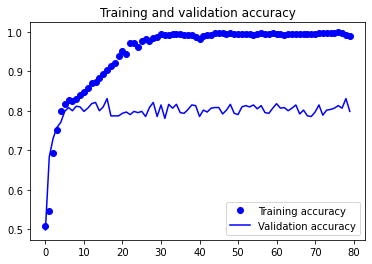

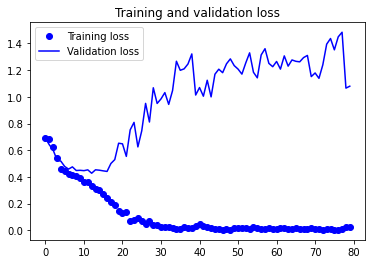

In [ ]:
#To plot the training and validation accuracy

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()